# Python e Arquivos do Computador

### Módulo os e pathlib

Os módulos os e pathlib são uns dos melhores módulos/bibliotecas para controlar as pastas e arquivos do seu computador. Existem alguns outros módulos que podem auxiliar dependendo do que você está querendo fazer, mas em essência conseguiremos usar esses módulos para resolver nossos desafios.

Usaremos aqui o pathlib por ele funcionar bem independente do sistema operacional que você está usando.

### Atenção Especial

Normalmente os caminhos em computadores Windows, Mac ou Linux são diferentes, mas isso é algo que o pathlib vai resolver para a gente

### Módulo shutil

Para as ações de copiar e colar arquivo, até conseguimos fazer com os módulos os e pathlib, mas é mais difícil e com maior margem de erro. MAS, existe o módulo shutil para ajudar nisso

- Importando os Módulos

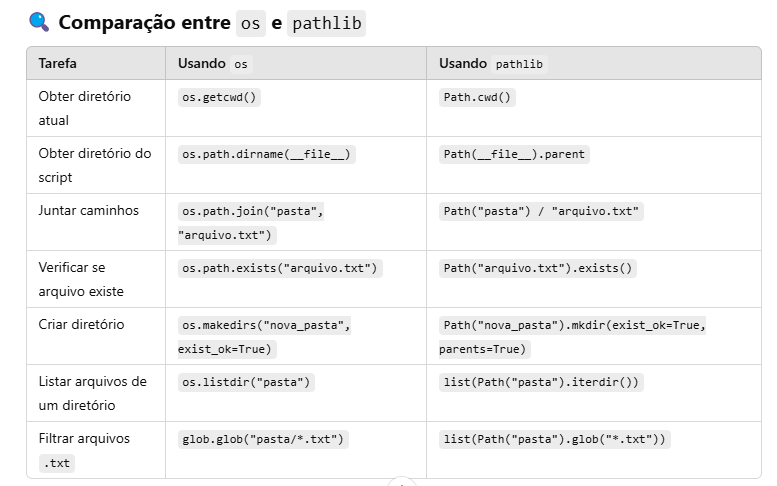

📌 Quando usar pathlib?
Se estiver usando Python 3.6 ou superior.
Para código mais moderno, limpo e legível.
Quando precisar manipular caminhos como objetos, sem lidar com strings diretamente.

📌 Quando usar os?
Se estiver usando versões antigas do Python.
Para operações muito específicas que ainda não foram totalmente substituídas no pathlib, como os.system().

AO UTILIZAR JUPITER NOTEBOOK:
UUtilizar Path.cwd() para substituir o __file__

- Descobrindo onde está o nosso arquivo

- Navegando até uma pasta específica

- Listando todos os arquivos da Pasta Atual

- Criando uma pasta

- Verificando se um Arquivo Existe

- Copiando um Arquivo

- Movendo um Arquivo

### Vamos listar todos os arquivos de uma pasta

In [1]:
from pathlib import Path

#print(Path.cwd())

#caminho = Path('C:/Users/user/Desktop/arquivos_base/arquivos_Lojas')
caminho = Path('../../01_auxiliares/arquivos_base/arquivos_Lojas')

arquivos = caminho.iterdir()
for arquivo in arquivos:
    print(arquivo)

..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Amazonas Shopping_AM.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Barra Shopping_RJ.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_BH Shopping_MG.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Bourbon_SP.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Buriti Shopping_GO.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Cidade de Sao Paulo_SP.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Goiania Shopping_GO.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Ibirapuera_SP.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Iguatemi_SP.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Independência Shopping_MG.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_JK Iguatemi_SP.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Minas Shopping_MG.csv
..\..\01_auxiliares\arquivos_base\arquivos_Lojas\201801_Morumbi_SP.c

### Agora, vamos verificar se um arquivo que estamos procurando existe na pasta

In [4]:
# caminho é uma variável de path, por isso, pode ser usada como referência
if (caminho / Path('201801_Amazonas Shopping_AM.csv')).exists():
    print('Existe')

Existe


### Criando uma nova pasta

In [6]:
Path('Pasta Auxiliar').mkdir()
Path('Pasta Auxiliar/Pasta2').mkdir()

### Criando uma cópia do nosso arquivo na nova pasta que criamos

In [60]:
import shutil
arquivo_copiar = Path('Arquivos_Lojas/201801_Amazonas Shopping_AM.csv')
arquivo_colar = Path('Pasta Auxiliar/201801_Amazonas Shopping_AM_versao2.csv')
shutil.copy2(arquivo_copiar, arquivo_colar)

WindowsPath('Pasta Auxiliar/201801_Amazonas Shopping_AM_versao2.csv')

### Movendo um arquivo de um lugar para o outro

In [62]:
# Primeiro parâmetro é a origem, segundo o destino
shutil.move(Path('Pasta Auxiliar/201801_Amazonas Shopping_AM_versao2.csv'), Path('Pasta Auxiliar/Pasta2/201801_Amazonas Shopping_AM_versao2.csv'))
# Mover e renomear:
shutil.move(Path('Pasta Auxiliar/201801_Amazonas Shopping_AM_versao2.csv'), Path('Pasta Auxiliar/Pasta2/Arquivo base.csv'))

WindowsPath('Pasta Auxiliar/Pasta2/201801_Amazonas Shopping_AM_versao2.csv')

### Desafio

Você trabalha em uma empresa que tem 18 lojas espalhadas por todo o Brasil e divididas em 5 estados diferentes:
- RJ
- SP
- MG
- GO
- AM

Todo trimestre, são calculados os indicadores de cada funcionário de cada loja e esses indicadores são armazenados em um arquivo em Excel.

Cada estado tem 1 Gerente Geral responsável por todas as lojas daqueles estados.

Pediram para você enviar para cada Gerente Geral todas as bases de indicadores correspondentes às lojas que ele é responsável, porque a equipe deles precisa desses indicadores.

Obs: Não vamos enviar por e-mail porque ainda não aprendemos a fazer isso, mas vamos deixar todos os arquivos em uma pasta única para cada gerente, ou seja, para cada estado.

Então o seu desafio é separar todos os arquivos de forma que cada arquivo esteja na pasta do estado correspondente aquele arquivo.

Obs: Para pegar o nome de um arquivo como um texto no pathlib, você pode usar Path.name ou arquivo.name:<br>
caminho = Path('Pasta/Arquivo.csv')<br>
print(caminho.name) -> resposta: 'Arquivo.csv'

In [86]:
from pathlib import Path
import shutil

estados = ['RJ', 'SP', 'MG', 'GO', 'AM']
for estado in estados:
    Path('arquivos_Lojas/{}'.format(estado)).mkdir()

In [92]:
caminho = Path('arquivos_Lojas/')
arquivos = caminho.iterdir()
for arquivo in arquivos:
    nome_arquivo = arquivo.name
    if nome_arquivo[-3:] == 'csv':
        estado = nome_arquivo[-6:-4]
        local_final = caminho / Path('{}/{}'.format(estado, nome_arquivo))
        shutil.move(arquivo, local_final)